# Housing Price Prediction Jupyter Notebook

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

The below code is commented out to prevent Future Warning. As the load_boston dataset was depricated, and would be removed in Version 1.2, a csv file named 'boston_price_pred.csv' was created and saved using version 1.0 for future use. 

In [2]:
# from sklearn.datasets import load_boston
# boston=load_boston()
# df=pd.DataFrame(boston['data'],columns=boston['feature_names'])
# df['MEDV']=boston['target']
# df.to_csv('boston_price_pred.csv')

In [3]:
df=pd.read_csv('boston_price_pred.csv')
df=df.drop('Unnamed: 0',axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df.drop('MEDV',axis=1),df['MEDV'],stratify=df['CHAS'],test_size=0.2,random_state=2)
train_df=pd.concat([X_train,Y_train],axis=1)
test_df=pd.concat([X_test,Y_test],axis=1)

In [9]:
print(train_df.shape,test_df.shape)

(404, 14) (102, 14)


In [10]:
print(train_df['CHAS'].value_counts())
print(test_df['CHAS'].value_counts())

0.0    376
1.0     28
Name: CHAS, dtype: int64
0.0    95
1.0     7
Name: CHAS, dtype: int64


In [11]:
train_df.corr()['MEDV'].sort_values()

LSTAT     -0.737593
INDUS     -0.504470
TAX       -0.492588
PTRATIO   -0.477634
NOX       -0.445997
RAD       -0.412149
CRIM      -0.394468
AGE       -0.384235
CHAS       0.123049
DIS        0.276704
B          0.351307
ZN         0.365807
RM         0.663773
MEDV       1.000000
Name: MEDV, dtype: float64

Text(0, 0.5, 'Price')

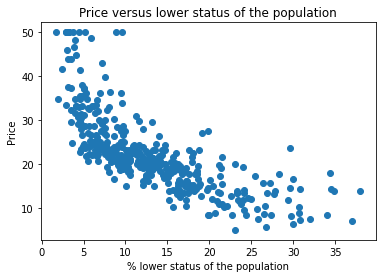

In [12]:
plt.scatter(train_df['LSTAT'],train_df['MEDV'])
plt.title("Price versus lower status of the population")
plt.xlabel("% lower status of the population")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

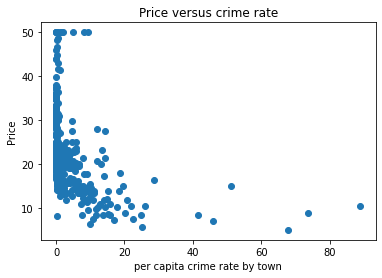

In [13]:
plt.scatter(train_df['CRIM'],train_df['MEDV'])
plt.title("Price versus crime rate")
plt.xlabel("per capita crime rate by town")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

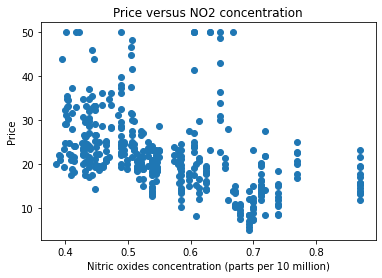

In [14]:
plt.scatter(train_df['NOX'],train_df['MEDV'])
plt.title("Price versus NO2 concentration")
plt.xlabel("Nitric oxides concentration (parts per 10 million)")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

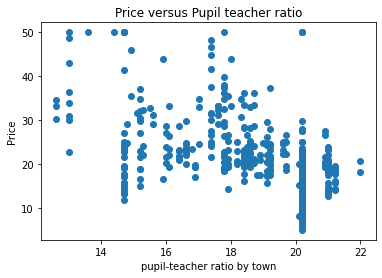

In [15]:
plt.scatter(train_df['PTRATIO'],train_df['MEDV'])
plt.title("Price versus Pupil teacher ratio")
plt.xlabel("pupil-teacher ratio by town")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

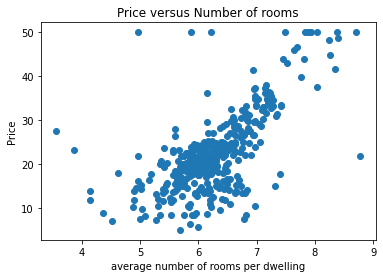

In [16]:
plt.scatter(train_df['RM'],train_df['MEDV'])
plt.title("Price versus Number of rooms")
plt.xlabel("average number of rooms per dwelling")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

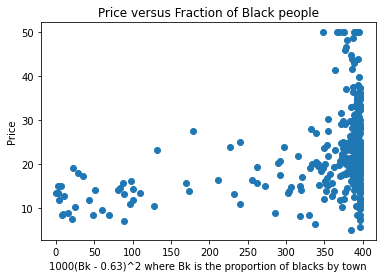

In [17]:
plt.scatter(train_df['B'],train_df['MEDV'])
plt.title("Price versus Fraction of Black people")
plt.xlabel("1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town")
plt.ylabel("Price")

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

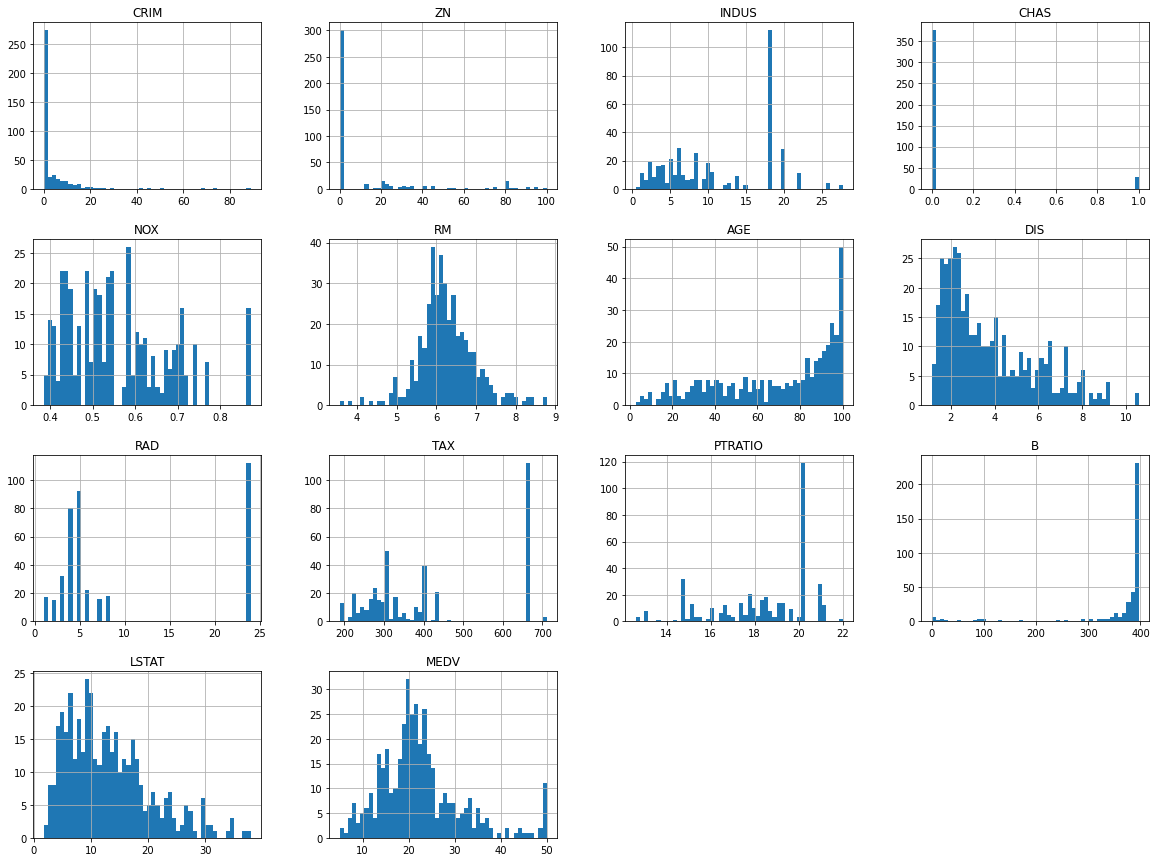

In [18]:
train_df.hist(bins=50,figsize=(20,15))

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(max_depth=4)
model.fit(X_train,Y_train)

RandomForestRegressor(max_depth=4)

In [21]:
from sklearn.metrics import mean_squared_error
predictions=model.predict(X_test)
predictions

array([33.32036828, 20.85908543, 44.54023179, 41.90006027, 14.86581778,
       13.94400507, 20.83864623, 24.43162167, 26.09735691, 19.9032102 ,
       43.17331015, 26.39909623, 11.32071725, 46.46857772, 26.9104896 ,
       22.60114069, 17.7438105 , 17.22157012, 20.90214087, 22.83755798,
       25.77264459, 16.05560892, 25.95527168, 22.95584969, 14.71731598,
       17.61350777, 21.00963073, 24.8522366 , 21.024255  , 34.09026371,
       10.1261995 , 10.64084709, 21.03014989, 15.34183212, 23.75739248,
       24.19113193, 23.58437032, 12.81686693, 24.14947115, 12.72725449,
       23.28349717, 23.90104359, 24.31129414, 24.05583691, 19.48462632,
       24.01407037, 10.1261995 , 33.10845092, 20.9113765 , 18.75788562,
       44.70999346, 32.08111741, 16.4435044 , 47.09892958, 20.59064642,
       47.82156665, 18.38588075, 23.13838286, 25.93129034, 20.85316527,
       20.89408243, 10.57235893, 23.46252274, 44.09259277, 23.8581732 ,
       21.0558611 , 24.63944351, 20.57718069, 15.74552597, 21.90

In [22]:
lin_mse=mean_squared_error(Y_test,predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

3.693933174113905

In [23]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X_test,Y_test,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)
rmse_scores

array([ 4.83955468,  3.43927379,  2.69514785,  1.26002937,  5.68343225,
        2.60696609,  3.56677789,  2.76866739,  4.4916149 , 10.60240541])

In [24]:
def score_info(score):
    print("Cross val rmse scores: ",score)
    print("Mean cross val rmse score: ",np.mean(score))
    print("Std: ",np.std(score))

In [25]:
score_info(rmse_scores)

Cross val rmse scores:  [ 4.83955468  3.43927379  2.69514785  1.26002937  5.68343225  2.60696609
  3.56677789  2.76866739  4.4916149  10.60240541]
Mean cross val rmse score:  4.195386961125182
Std:  2.4527408113924545


(0.0, 55.0)

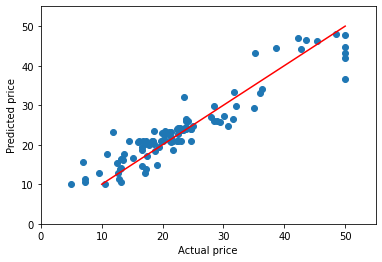

In [26]:
plt.scatter(Y_test,predictions)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.plot([10,50],[10,50],color='r')
plt.xlim([0,55])
plt.ylim([0,55])

In [27]:
difference=Y_test-predictions
difference

231    -1.620368
357     0.840915
97     -5.840232
225     8.099940
468     4.234182
         ...    
83     -0.857392
33     -3.378200
329    -1.157392
401    -4.009905
370    13.452802
Name: MEDV, Length: 102, dtype: float64

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

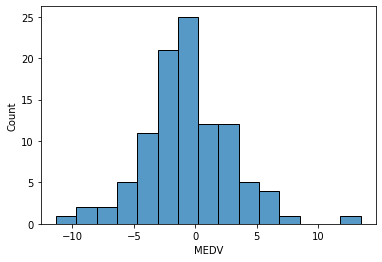

In [28]:
sns.histplot(difference)

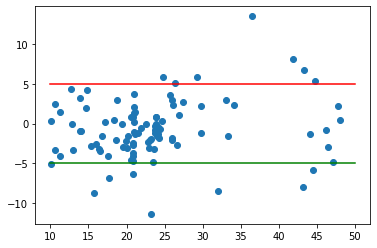

In [29]:
plt.scatter(predictions,difference)
plt.plot([10,50],[5,5],color='r')
plt.plot([10,50],[-5,-5],color='g')

In [30]:
np.array(df.drop('MEDV',axis=1).iloc[0]).reshape(-1,1).reshape(1,13)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [31]:
scaler.transform(np.array(df.drop('MEDV',axis=1).iloc[0]).reshape(-1,1).reshape(1,13))

C:\Python37\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.42079275,  0.29225535, -1.33633197, -0.27288841, -0.1849006 ,
         0.45840428, -0.13858015,  0.18047592, -1.00614113, -0.70164153,
        -1.42754141,  0.45794912, -1.10777315]])

In [32]:
model.predict(scaler.transform(np.array(df.drop('MEDV',axis=1).iloc[0]).reshape(-1,1).reshape(1,13)))

C:\Python37\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([25.99465483])

In [33]:
df.iloc[0]

CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
MEDV        24.00000
Name: 0, dtype: float64

In [34]:
import pickle
pickle.dump(model,open('house_model.pkl','wb'))

In [35]:
pickled_model=pickle.load(open('house_model.pkl','rb'))
pickled_model.predict(scaler.transform(np.array(df.drop('MEDV',axis=1).iloc[0]).reshape(-1,1).reshape(1,13)))

C:\Python37\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([25.99465483])